Skull stripping completed.


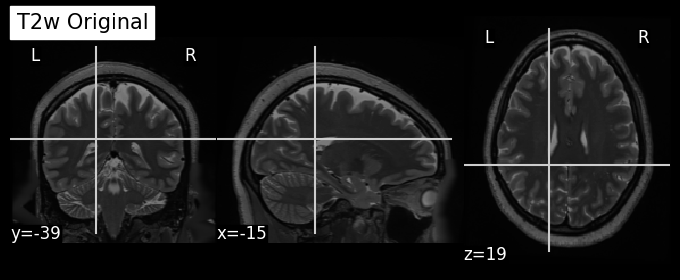

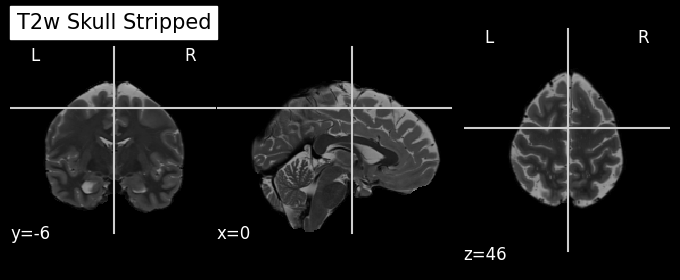

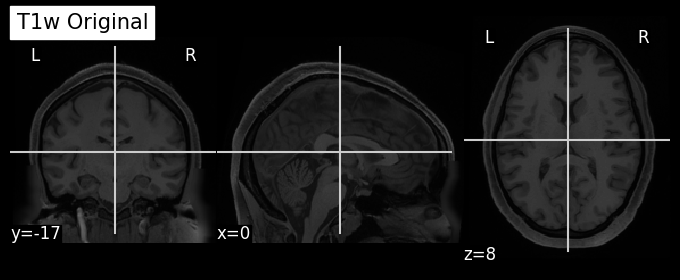

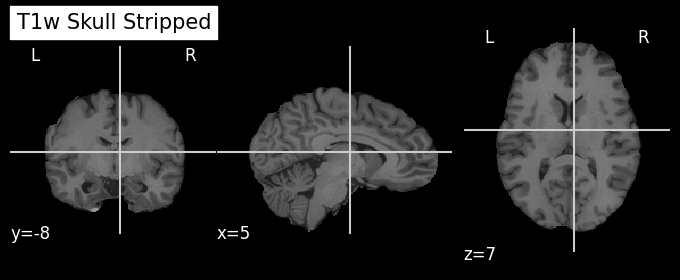

In [2]:
import os
import subprocess
from nilearn import plotting

def skull_stripping(input_file, output_file, bet_frac=0.5):
    """
    Perform skull stripping using FSL's BET.
    
    Args:
        input_file (str): Path to the input NIfTI file.
        output_file (str): Path to the output NIfTI file after skull stripping.
        bet_frac (float): Fractional intensity threshold (default: 0.5).
    """
    bet_cmd = f"bet {input_file} {output_file} -f {bet_frac}"
    subprocess.run(bet_cmd, shell=True, check=True)

def display_image(image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        image_file (str): Path to the NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(image_file, title=title, display_mode='ortho')
    plotting.show()

if __name__ == "__main__":
    # Define input and output file paths
    data_dir = os.path.join('..', 'data')
    
    t2w_input = os.path.join(data_dir, "T2w_1mm_noalign.nii.gz")
    t2w_output = os.path.join(data_dir, "T2w_1mm_noalign_brain.nii.gz")
    
    t1w_input = os.path.join(data_dir, "T1w_1mm.nii.gz")
    t1w_output = os.path.join(data_dir, "T1w_1mm_brain.nii.gz")
    
    # Perform skull stripping for T2w and T1w images
    skull_stripping(t2w_input, t2w_output)
    skull_stripping(t1w_input, t1w_output)
    
    print("Skull stripping completed.")
    
    # Display original and skull-stripped images
    display_image(t2w_input, "T2w Original")
    display_image(t2w_output, "T2w Skull Stripped")
    display_image(t1w_input, "T1w Original")
    display_image(t1w_output, "T1w Skull Stripped")
